In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
import pandas as pd

In [13]:
pr = pd.read_csv('50_Startups.csv')

In [14]:
pr.shape

(50, 4)

In [15]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [16]:
pr.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


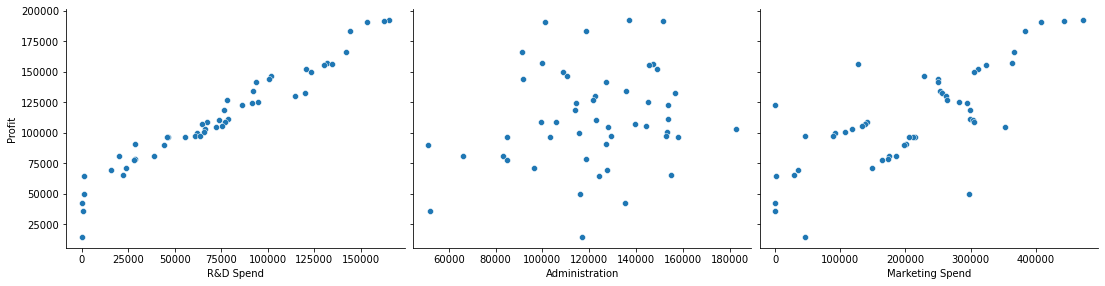

In [17]:
sns.pairplot(pr,x_vars = ['R&D Spend','Administration','Marketing Spend'],
             y_vars = 'Profit', height = 4, aspect = 1.3, kind = 'scatter')
mat.show()

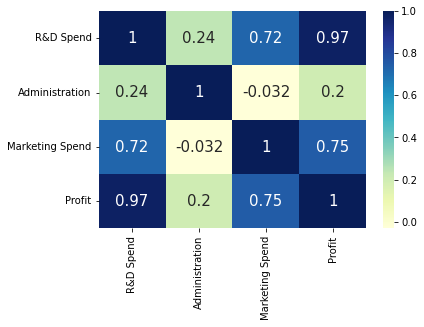

In [18]:
sns.heatmap(pr.corr(), cmap = 'YlGnBu', annot = True, annot_kws={'size': 15})
mat.show()

In [19]:
x = pr['R&D Spend']
y = pr['Profit']

In [20]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts = train_test_split(x, y, train_size = 0.7, 
                                             test_size = 0.3,
                                             random_state = 100)

In [22]:
x_tr.shape
x_tr = x_tr.values.reshape(-1,1)
x_ts = x_ts.values.reshape(-1,1) # Array
print(x_tr.shape)
print(x_ts.shape)

(35, 1)
(15, 1)


In [23]:
print(x_tr)

[[ 64664.71]
 [ 75328.87]
 [ 46014.02]
 [ 94657.16]
 [130298.13]
 [     0.  ]
 [ 61136.38]
 [ 63408.86]
 [ 86419.7 ]
 [ 78389.47]
 [ 91992.39]
 [162597.7 ]
 [142107.34]
 [ 93863.75]
 [ 72107.6 ]
 [ 28754.33]
 [ 73994.56]
 [ 65605.48]
 [123334.88]
 [ 78013.11]
 [ 22177.74]
 [   542.05]
 [  1315.46]
 [119943.24]
 [ 27892.92]
 [153441.51]
 [ 46426.07]
 [ 61994.48]
 [101913.08]
 [114523.61]
 [ 67532.53]
 [ 38558.51]
 [144372.41]
 [ 77044.01]
 [120542.52]]


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr, y_tr)

LinearRegression()

In [25]:
bias = lr.intercept_
weight = lr.coef_
print('Bias : ',bias)
print('Weight : ',weight)

Bias :  46823.27683169804
Weight :  [0.87393216]


In [26]:
y_tr_pred = lr.predict(x_tr)
y_ts_pred = lr.predict(x_ts)

In [27]:
print(y_tr_pred)

[103335.84667899 112655.59908897  87036.4088353  129547.21336596
 160695.00335142  46823.2768317  100252.3256121  102238.31897273
 122348.23213471 115330.35586549 127218.38515731 188922.63640911
 171015.45178405 128853.82684892 109840.42763189  71952.61062964
 111489.50266523 104158.0158395  154609.59522093 115001.44275682
  66205.11710911  47296.99176038  47972.89963417 151645.53194134
  71199.79672555 180920.74748222  87396.51258286 101002.24680074
 135888.39522244 146909.14297552 105842.12681323  80520.79885851
 172994.96930735 114154.51509814 152169.26200767]


In [28]:
print(y_ts_pred)

[164468.05689451  71873.45859368  85337.42353616 104547.82454126
  60374.23298163  46823.2768317  162074.74123159  95321.22456049
 113463.97759995  67483.84590995 191327.26075421 134803.74053692
 127005.81863743  47697.40999859  64502.56616675]


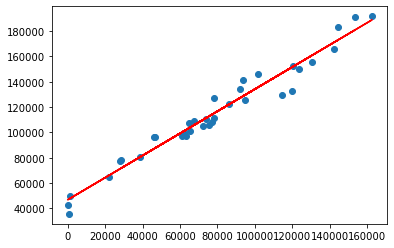

In [29]:
mat.scatter(x_tr, y_tr)
mat.plot(x_tr,bias + weight * x_tr, 'r')
mat.show()

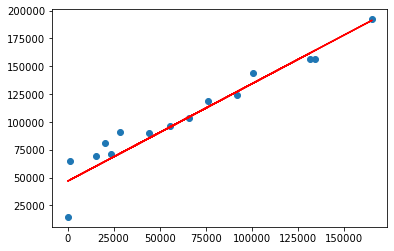

In [30]:
mat.scatter(x_ts, y_ts)
mat.plot(x_ts, y_ts_pred, 'r')
mat.show()

In [35]:
x = int(input("Enter the R & D Spend : "))
ans = lr.predict([[x]])
print(ans)

Enter the R & D Spend : 73721
[111250.42978286]
